In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import datetime
from datetime import timedelta, time
import matplotlib.pyplot as plt
import seaborn as sns

## 4. 서울 DMS + 7일 평균 기후

### Reading Data

In [2]:
url = 'https://raw.githubusercontent.com/gentle-potato/21KDT-Project/master/DataAnalysis%26Visualization/%EA%B8%B0%ED%9B%84%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EB%AA%A8%EA%B8%B0%20%EB%B0%9C%EC%83%9D%20%EC%98%88%EB%B3%B4/%EB%8D%B0%EC%9D%B4%ED%84%B0/%ED%86%B5%ED%95%A9%20%EB%8D%B0%EC%9D%B4%ED%84%B0/4.%20dms_seoul_avg.csv'
df4 = pd.read_csv(url)
df4['date'] = pd.to_datetime(df4['date'], format = '%Y-%m-%d')
df4

,date,mosquito,temp,l_temp,h_temp,rain_per_day,accum_rain,wind,dew,humidity,steam_pressure,sunshine_time,sunshine,ground_surface_temp
0,2015-04-06,199,12.214286,8.757143,16.500000,5.285714,0,3.371429,5.971429,68.757143,9.700000,2.814286,8.880000,12.771429
1,2015-04-07,146,11.571429,8.114286,16.114286,4.928571,0,3.428571,4.757143,65.742857,8.928571,3.485714,9.891429,12.700000
2,2015-04-08,90,10.914286,7.185714,15.557143,4.571429,0,3.257143,3.671429,63.542857,8.328571,3.914286,9.927143,11.928571
3,2015-04-09,172,10.171429,6.514286,14.771429,0.571429,0,2.871429,1.985714,59.614286,7.314286,4.771429,10.884286,11.557143
4,2015-04-10,249,10.314286,6.185714,15.357143,0.071429,0,2.871429,0.585714,53.485714,6.571429,6.085714,12.777143,11.671429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,2020-10-27,535,11.942857,7.314286,17.057143,0.000000,0,2.185714,4.614286,63.242857,8.914286,7.371429,12.734286,12.142857
1169,2020-10-28,884,11.900000,6.857143,17.185714,0.000000,0,2.271429,3.800000,60.771429,8.500000,8.671429,14.241429,12.157143
1170,2020-10-29,695,11.514286,6.442857,16.885714,0.000000,0,2.157143,2.457143,57.100000,7.771429,9.185714,14.635714,11.628571
1171,2020-10-30,543,11.985714,6.500000,17.785714,0.000000,0,1.942857,2.500000,55.871429,7.800000,9.157143,14.294286,11.700000


In [3]:
# datetime으로 되어있는지 확인
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1173 non-null   datetime64[ns]
 1   mosquito             1173 non-null   int64         
 2   temp                 1173 non-null   float64       
 3   l_temp               1173 non-null   float64       
 4   h_temp               1173 non-null   float64       
 5   rain_per_day         1173 non-null   float64       
 6   accum_rain           1173 non-null   int64         
 7   wind                 1173 non-null   float64       
 8   dew                  1173 non-null   float64       
 9   humidity             1173 non-null   float64       
 10  steam_pressure       1173 non-null   float64       
 11  sunshine_time        1173 non-null   float64       
 12  sunshine             1173 non-null   float64       
 13  ground_surface_temp  1173 non-nul

In [ ]:
# # month, year, day 변수 생성
# df4['year'] = df4['date'].apply(lambda x : x.year)
# df4['month'] = df4['date'].apply(lambda x : x.month)
# df4['day'] = df4['date'].apply(lambda x : x.day)

In [4]:
df4.isnull().sum()

date                   0
mosquito               0
temp                   0
l_temp                 0
h_temp                 0
rain_per_day           0
accum_rain             0
wind                   0
dew                    0
humidity               0
steam_pressure         0
sunshine_time          0
sunshine               0
ground_surface_temp    0
dtype: int64

결측치 없음

## 시각화

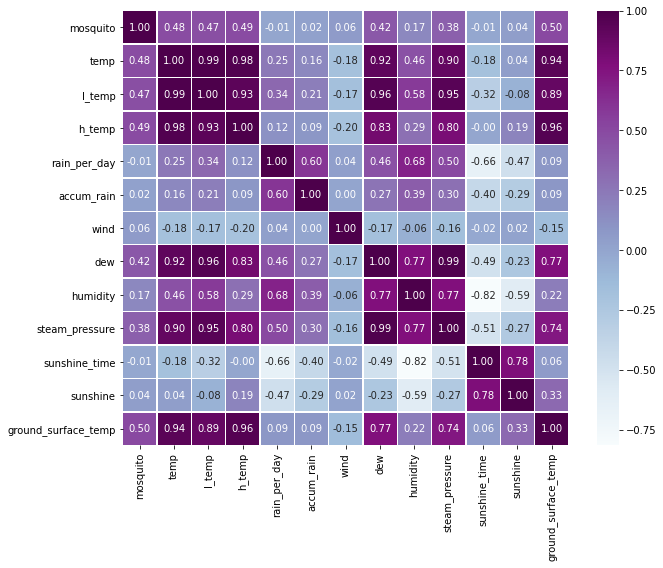

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df4.corr(method='pearson'), annot=True,fmt='.2f', linewidths=.5, cmap='BuPu')

In [ ]:
df4.columns

Index(['date', 'mosquito', 'temp', 'l_temp', 'h_temp', 'rain_per_day',
       'accum_rain', 'wind', 'dew', 'humidity', 'steam_pressure',
       'sunshine_time', 'sunshine', 'ground_surface_temp', 'year', 'month',
       'day'],
      dtype='object')

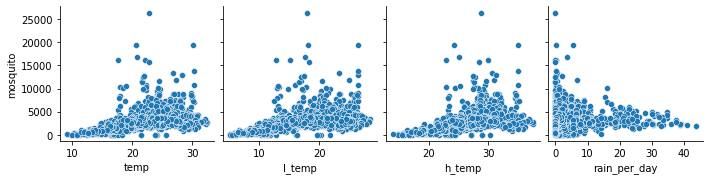

In [ ]:
# pairplot 변수 4개씩 그려보기
sns.pairplot(df4, x_vars=['temp', 'l_temp', 'h_temp', 'rain_per_day',],y_vars=['mosquito'])

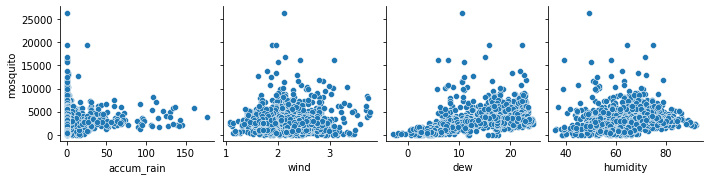

In [ ]:
# pairplot 변수 4개씩 그려보기
sns.pairplot(df4, x_vars=['accum_rain', 'wind', 'dew', 'humidity'],y_vars=['mosquito'])

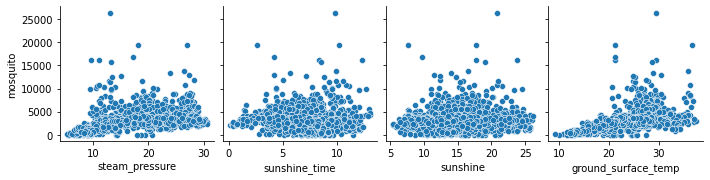

In [ ]:
# pairplot 변수 4개씩 그려보기
sns.pairplot(df4, x_vars=['steam_pressure','sunshine_time', 'sunshine', 'ground_surface_temp'],y_vars=['mosquito'])

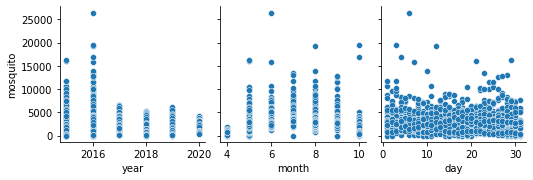

In [ ]:
# pairplot 변수 4개씩 그려보기
sns.pairplot(df4, x_vars=['year', 'month', 'day'],y_vars=['mosquito'])

## **다중공선성 확인**

회귀 모델에 다중공선성이 있는지 파악하는 방법은 두 가지가 있습니다.

1. 산점도 그래프 (Scatter plot Matrix)

2. VIF (Variance Inflation Factors, 분산팽창요인)

VIF가 10이 넘으면 다중공선성 있다고 판단하며 5가 넘으면 주의할 필요가 있는 것으로 봅니다. 

[다중공선성(Multicollinearity)과 VIF(Variance Inflation Factors)](ttps://bkshin.tistory.com/entry/DATA-20-%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1%EA%B3%BC-VIF)

In [ ]:
# dmatirces, variance_inflation_factor 라이브러리가 추가
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


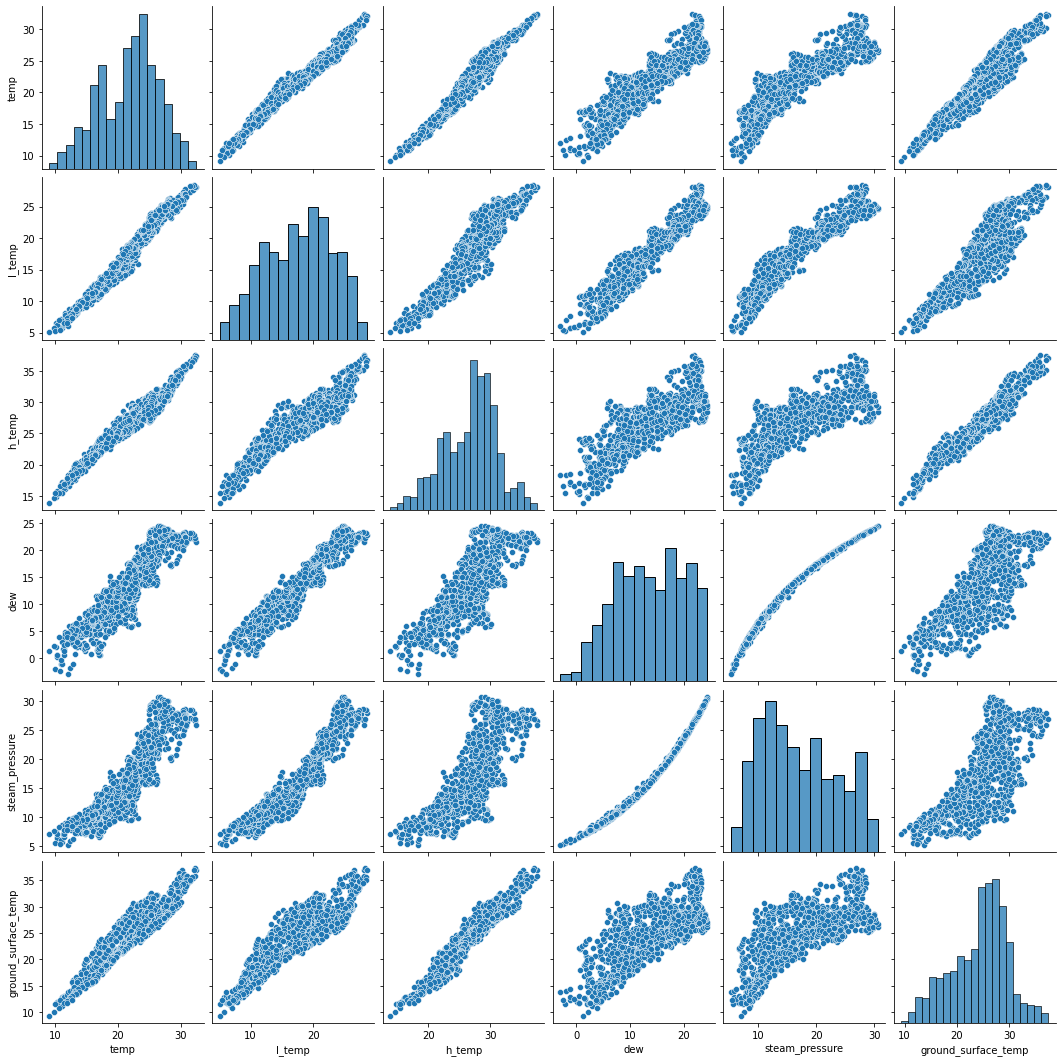

In [ ]:
# 산점도 그래프를 통해 다중공선성 확인
# heatmap에서  'temp', 'l_temp', 'h_temp', 'dew', 'steam_pressure','ground_surface_temp'가 높은 양의 상관관계가 있는 것을 나타남
sns.pairplot(df4[['temp', 'l_temp', 'h_temp', 'dew', 'steam_pressure','ground_surface_temp']])
# 산점도 그래프 결과 대부분의 경우 강한 양의 상관관계가 있음 -> 다중공선성을 파악할 수 있음

In [ ]:
df4['intercept'] = 1
lm = sm.OLS(df4['mosquito'], df4[['temp', 'l_temp', 'h_temp', 'dew', 'steam_pressure','ground_surface_temp']])
results = lm.fit()
results.summary()
# temp의 coef : -926, steam_pressure의 coef : -419 => 음의 상관관계가 나오는 것으로 나옴 
# 다중공선성으로 인해 회귀 결과가 잘못나옴

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               mosquito   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              585.8
Date:                Sun, 18 Jul 2021   Prob (F-statistic):                        0.00
Time:                        18:39:57   Log-Likelihood:                         -10618.
No. Observations:                1173   AIC:                                  2.125e+04
Df Residuals:                    1167   BIC:                                  2.128e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
temp                 -926.0829    311.515     -2.973      0.003   -1537.275    -314.891
l_temp                690.3606    186.890      3.694      0.000     323.682    1057.039
h_temp                392.6378    144.373      2.720      0.007     109.377     675.898
dew                   350.6943     64.858      5.407      0.000     223.444     477.945
steam_pressure       -419.7684     55.880     -7.512      0.000    -529.405    -310.131
ground_surface_temp   130.7483     44.487      2.939      0.003      43.464     218.032
==============================================================================
Omnibus:                      901.213   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23818.169
Skew:                           3.308   Prob(JB):                         0.00
Kurtosis:                      24.061   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# VIF를 통해 다중공선성 파악
y, X = dmatrices('mosquito ~ temp + l_temp + h_temp + dew + steam_pressure + ground_surface_temp', df4, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif
# VIF가 10이 넘으면 다중공선성 있다고 판단하며 5가 넘으면 주의할 필요가 있는 것으로 봄
# 모두 VIF Factor가 10 이상이므로 서로 강한 상관 관계를 보임.

,VIF Factor,features
0,165.685180,Intercept
1,594.891027,temp
2,298.294614,l_temp
3,121.001979,h_temp
4,47.825990,dew
5,43.966132,steam_pressure
6,17.673594,ground_surface_temp


In [ ]:
# VIF 10 이상 변수 drop을 통한 다중공선성 해결
df4['intercept'] = 1
lm = sm.OLS(df4['mosquito'], df4[['temp', 'l_temp', 'h_temp']])
results = lm.fit()
results.summary()
# temp의 coef : -729.3281=> 음의 상관관계가 나오는 것으로 나옴 
# 다중공선성으로 인해 회귀 결과가 잘못나옴

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               mosquito   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.726
Method:                 Least Squares   F-statistic:                              1036.
Date:                Sun, 18 Jul 2021   Prob (F-statistic):                        0.00
Time:                        18:39:57   Log-Likelihood:                         -10673.
No. Observations:                1173   AIC:                                  2.135e+04
Df Residuals:                    1170   BIC:                                  2.137e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp        -729.3281    315.882     -2.309      0.021   -1349.086    -109.570
l_temp       556.8577    163.533      3.405      0.001     236.007     877.709
h_temp       352.8108    150.959      2.337      0.020      56.630     648.991
==============================================================================
Omnibus:                      901.898   Durbin-Watson:                   0.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22853.069
Skew:                           3.330   Prob(JB):                         0.00
Kurtosis:                      23.573   Cond. No.                         241.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# VIF 10 이상 변수 drop을 통한 다중공선성 해결
df4['intercept'] = 1
lm = sm.OLS(df4['mosquito'], df4[['temp', 'h_temp']])
results = lm.fit()
results.summary()
# h_temp의 coef : -147.4043	=> 음의 상관관계가 나오는 것으로 나옴 
# 다중공선성으로 인해 회귀 결과가 잘못나옴

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               mosquito   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              1534.
Date:                Sun, 18 Jul 2021   Prob (F-statistic):                        0.00
Time:                        18:39:57   Log-Likelihood:                         -10679.
No. Observations:                1173   AIC:                                  2.136e+04
Df Residuals:                    1171   BIC:                                  2.137e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp         336.6140     42.490      7.922      0.000     253.248     419.980
h_temp      -147.4043     34.933     -4.220      0.000    -215.942     -78.867
==============================================================================
Omnibus:                      897.131   Durbin-Watson:                   0.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22412.818
Skew:                           3.308   Prob(JB):                         0.00
Kurtosis:                      23.367   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# VIF 10 이상 변수 drop을 통한 다중공선성 해결
df4['intercept'] = 1
lm = sm.OLS(df4['mosquito'], df4[['temp']])
results = lm.fit()
results.summary()
# 다중공선성 문제를 해결하니 올바른 결과가 도출

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               mosquito   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                              3007.
Date:                Sun, 18 Jul 2021   Prob (F-statistic):                        0.00
Time:                        18:39:58   Log-Likelihood:                         -10688.
No. Observations:                1173   AIC:                                  2.138e+04
Df Residuals:                    1172   BIC:                                  2.138e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp         157.7242      2.876     54.833      0.000     152.081     163.368
==============================================================================
Omnibus:                      887.114   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20967.066
Skew:                           3.275   Prob(JB):                         0.00
Kurtosis:                      22.649   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#  VIF도 재계산
y, X = dmatrices('mosquito ~ temp', df4, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,22.147853,Intercept
1,1.000000,temp


## **Outlier 확인**

In [ ]:
# boxplot으로 outlier 확인

In [ ]:
# # 한글깨짐현상 해결 - 나눔 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic') 

{'boxes': [<matplotlib.lines.Line2D at 0x7f4351385e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4351319410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f435138a550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f43514c1d50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4351434fd0>,
  <matplotlib.lines.Line2D at 0x7f435134a410>]}

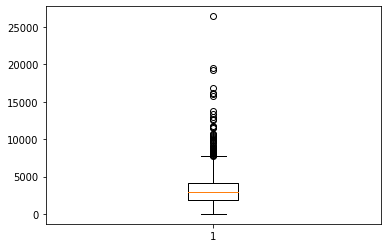

In [ ]:
plt.boxplot(df4['mosquito'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


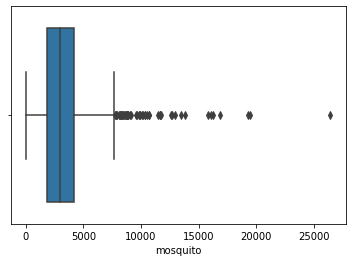

In [ ]:
sns.boxplot(df4['mosquito'])
# plt.title("모기개체수의 Box Plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


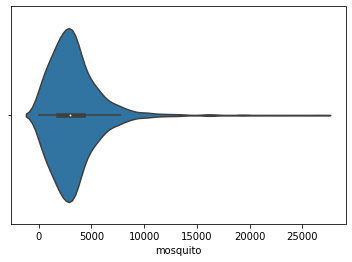

In [ ]:
sns.violinplot(df4['mosquito'])
# plt.title("모기개체수의 Violin Plot")
plt.show()

In [ ]:
df_graph['mosquito'] = df4['date']

TypeError: ignored

In [ ]:
# df_graph = []
df_graph['time'] = df4['date']
df_graph = df_graph.set_index('time', drop = True)
df.head()

TypeError: ignored

In [ ]:
# np.random.seed(0)
plt.figure(figsize=(20,8))
sns.stripplot(x="date", y="mosquito", data=df4, jitter=True)
# sns.stripplot(df4["mosquito"], jitter=True)

plt.show()

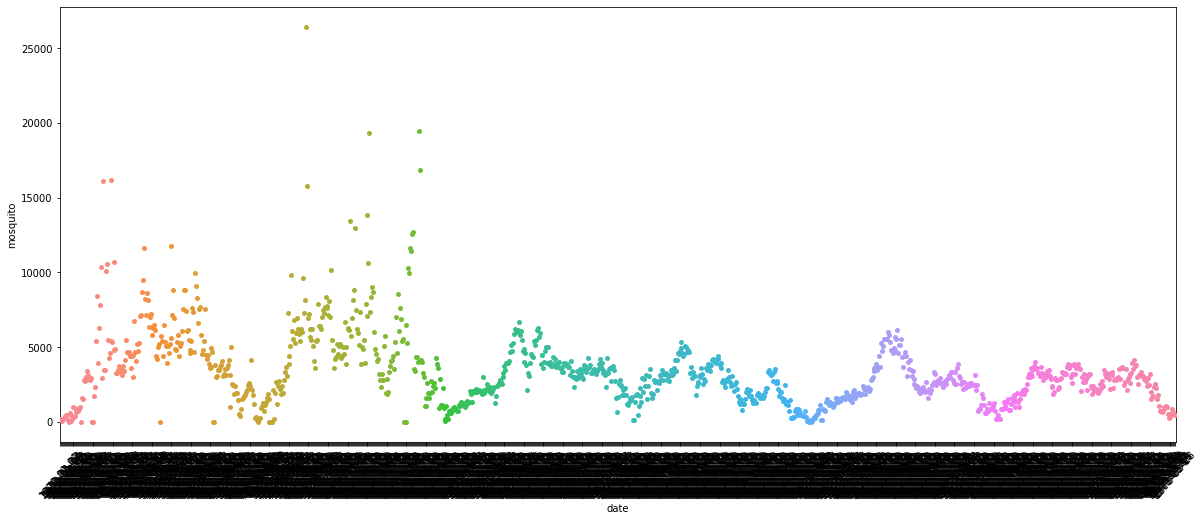

In [ ]:
np.random.seed(500)
plt.figure(figsize=(20,8))
sns.stripplot(x="date", y="mosquito", data=df4, jitter=True)

# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
ax.set_xticklabels([pd.to_datetime(tm, unit='d').strftime('%Y-%m-%d') for tm in xticks],
 rotation=50)

plt.show()

plt.show()

In [ ]:
import matplotlib.dates as mdates

<Figure size 1440x576 with 0 Axes>

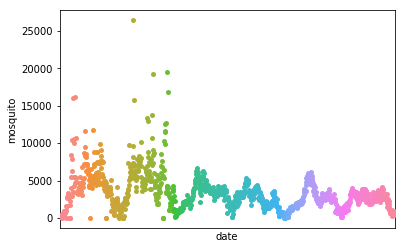

In [ ]:
np.random.seed(500)
plt.figure(figsize=(20,8))
fig,ax = plt.subplots()
sns.stripplot(x="date", y="mosquito", data=df4, jitter=True)

ax.xaxis.set_tick_params(reset=True)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

<Figure size 1440x576 with 0 Axes>

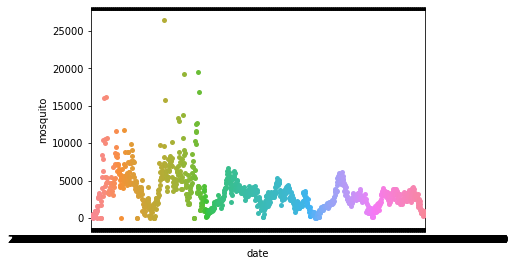

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,8))
fig,ax = plt.subplots()
ax.xaxis.set_tick_params(reset=True)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

sns.stripplot(x="date", y="mosquito", data=df4, jitter=True)

plt.show()

In [ ]:
import matplotlib.dates as mdates

In [ ]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format. Will be clear in Screenshot

In [ ]:
# axes.xaxis.set\_major\_locator(months)

In [ ]:
df4['date']

0      2015-04-06
1      2015-04-07
2      2015-04-08
3      2015-04-09
4      2015-04-10
          ...    
1168   2020-10-27
1169   2020-10-28
1170   2020-10-29
1171   2020-10-30
1172   2020-10-31
Name: date, Length: 1173, dtype: datetime64[ns]

In [ ]:
x_dates = df4['date'].strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

AttributeError: ignored

AttributeError: ignored

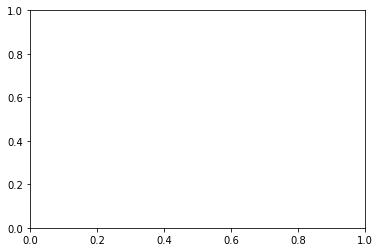

In [ ]:
ax = plt.gca()
xticks = ax.get_xticks()
xticks_dates = [df4['date'].strftime('%Y-%m-%d %H:%M:%S') for x in xticks]
ax.set_xticklabels(xticks_dates)

In [ ]:
fig, axes = plt.subplots(figsize=(20,7))
sns.stripplot(x="date", y="mosquito", data=df4, jitter=True)

axes.xaxis.set\_major\_locator(months)
axes.xaxis.set\_major\_formatter(years_fmt)
axes.xaxis.set\_minor\_locator(months)

plt.xticks(rotation = 'vertical')
plt.show()

SyntaxError: ignored

In [ ]:
years\_fmt = mdates.DateFormatter('%Y')

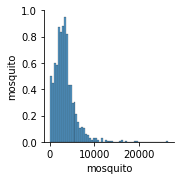

In [ ]:
sns.pairplot(df4, x_vars=['mosquito'],y_vars=['mosquito'])

Outlier 제거 - > 전처리

## drop을 통한 다중공선성 해결

In [8]:
df4.head()

,date,mosquito,temp,l_temp,h_temp,rain_per_day,accum_rain,wind,dew,humidity,steam_pressure,sunshine_time,sunshine,ground_surface_temp
0,2015-04-06,199,12.214286,8.757143,16.500000,5.285714,0,3.371429,5.971429,68.757143,9.700000,2.814286,8.880000,12.771429
1,2015-04-07,146,11.571429,8.114286,16.114286,4.928571,0,3.428571,4.757143,65.742857,8.928571,3.485714,9.891429,12.700000
2,2015-04-08,90,10.914286,7.185714,15.557143,4.571429,0,3.257143,3.671429,63.542857,8.328571,3.914286,9.927143,11.928571
3,2015-04-09,172,10.171429,6.514286,14.771429,0.571429,0,2.871429,1.985714,59.614286,7.314286,4.771429,10.884286,11.557143
4,2015-04-10,249,10.314286,6.185714,15.357143,0.071429,0,2.871429,0.585714,53.485714,6.571429,6.085714,12.777143,11.671429


In [14]:
# temp(평균기온)만 남기고 평균기온과 상관성이 큰 컬럼과 date 컬럼 제거
date = df4['date']
df4.drop(['date', 'l_temp', 'h_temp', 'dew', 'steam_pressure', 'sunshine_time', 'ground_surface_temp', 'intercept','year', 'month', 'day'], axis=1, inplace=True)
# df4.drop(['date', 'l_temp', 'h_temp', 'dew', 'steam_pressure', 'sunshine_time', 'ground_surface_temp'], axis=1, inplace=True)
# VIF 하면서 생긴 변수 intercept 도 제거
df4

,mosquito,temp,rain_per_day,accum_rain,wind,humidity,sunshine
0,199,12.214286,5.285714,0,3.371429,68.757143,8.880000
1,146,11.571429,4.928571,0,3.428571,65.742857,9.891429
2,90,10.914286,4.571429,0,3.257143,63.542857,9.927143
3,172,10.171429,0.571429,0,2.871429,59.614286,10.884286
4,249,10.314286,0.071429,0,2.871429,53.485714,12.777143
...,...,...,...,...,...,...,...
1168,535,11.942857,0.000000,0,2.185714,63.242857,12.734286
1169,884,11.900000,0.000000,0,2.271429,60.771429,14.241429
1170,695,11.514286,0.000000,0,2.157143,57.100000,14.635714
1171,543,11.985714,0.000000,0,1.942857,55.871429,14.294286


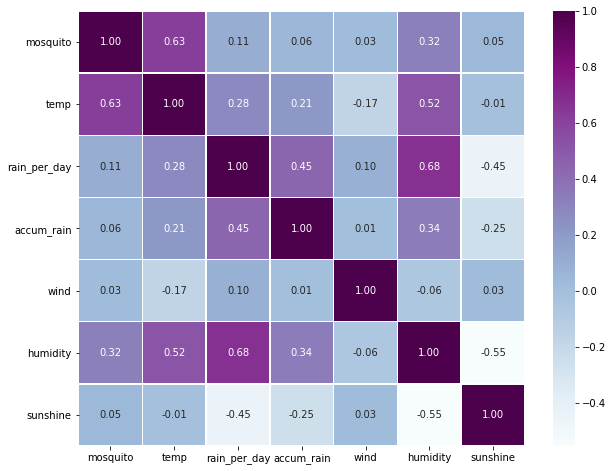

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df4.corr(method='spearman'), annot=True,fmt='.2f', linewidths=.5, cmap='BuPu')

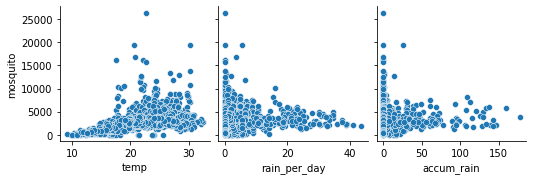

In [ ]:
sns.pairplot(df4, x_vars=['temp','rain_per_day', 'accum_rain'],y_vars=['mosquito'])

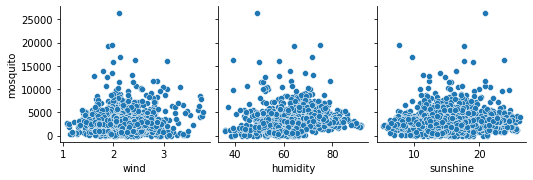

In [ ]:
sns.pairplot(df4, x_vars=['wind', 'humidity', 'sunshine' ],y_vars=['mosquito'])

### Setting Target Variable

In [ ]:
# y = df4['mosquito']
# X = df4.drop('mosquito', axis=1)

In [ ]:
# y.head()

In [ ]:
# X.head()

### To CSV

In [ ]:
# y = pd.DataFrame(y, columns=['mosquito'])

# y.head()

In [ ]:
# data4 = pd.concat([date, y, X], axis=1)

# data4.head()

In [ ]:
# data4.to_csv('4. dms_seoul_avg.csv', index=False)
# # index 컬럼이 새로 생성되기 때문에 csv 파일에서 컬럼 제거 필요